## **Coffee Quality Analysis and Coffee Profle Prediction**


Bagi para penikmat kopi, tentu rasa adalah hal yang paling utama. Maka dari itu setiap biji kopi yang diproses akan diuji oleh seorang panelis untuk mengetahui rasa, tingkat keasaman, kemanisan,aroma dan lain-lain. Disini saya akan menyediakan analisis-analisis pada data serta pembuatan model prediksi profil kopi berdasarkan parameter-parameter penilaian tersebut.   



### **Import Module**

In [1]:
#Import modul
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from dateutil import parser

### **Accessing Data**

In [2]:
#Pembacaan data
df = pd.read_csv('D:\My AI Project\Coffee Dataset\df_arabica_clean.csv')
df

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\INTEL\AppData\Local\Temp\ipykernel_3972\1957038517.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\My AI Project\Coffee Dataset\df_arabica_clean.csv')


,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


Jika dilihat ada beberapa kolom yang berisi data-data yang tidak seharusnya. Seperti Lot Number yang berisi alamat atau ICO number yang tidak berisi angka. Akan dilakukan proses data cleansing untuk memperkecil dimensi data dan mempermudah proses analisis.

## **Data Cleansing**

Data Cleansing penting untuk dilakukan agar perhitungan statistik dan model machine learning yang dibuat menjadi akurat. Dengan mengisi seluruh sel yang kosong dengan data modus, menyamakan standar skala untuk suatu nilai dan menghapuskan kolom-kolom yang redundan akan mempercepat prosesn analisis data

In [3]:
clean_df = df.drop(columns = ["Lot Number","ICO Number"])
clean_df

,Unnamed: 0,ID,Country of Origin,Farm Name,Mill,Company,Altitude,Region,Producer,Number of Bags,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,oklao coffee processing plant,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,La Montana Tarrazu MIll,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,Dry Mill,Ipanema Coffees,950,Sul de Minas,Ipanema Coffees,2240,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,Beneficio Atlantic Sébaco,Exportadora Atlantic S.A,1200,Matagalpa,Exportadora Atlantic S.A.,300,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,DRY MILL,Marubeni Corporation,1300,Bolaven Plateau,"LAO MINH TIEN COFFEE SOLE CO.,LTD",343,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila","Optimum Coffee, San Salvador, El Salvador",Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",Roselia Yglesias,1,...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


Kita akan coba lakukan pembersihan pada data numerik yang terdefinisi sebagai string, yaitu Altitude

In [4]:
#cek kolom Altitude
clean_df["Altitude"].unique()


array(['1700-1930', '1200', '1300', '1900', '1850-2100', '1668', '1250',
       '1400-1700', '1800-2200', '2000', '1900-2000', '1850', '1100',
       '1900-2100', '1570-1600', '850', '1500-1700', '1350', '1060',
       '600', '150-250', '668', '1950', '2150 - 2350', '1700', '650',
       '1600-1900', '300-500', '1000', '800', '1905', '150', '1600',
       '4700', '350-400', '230', '1750', '1654', '1400', '4895',
       '200-300', '700', '1450', '520', '1368', '1943', '400',
       '1300-1400', '2361', '1500', '2100', '1250-1350', '1500-1600',
       '1800', '1600-1750', '1411', '4895 A 5650', '400-600', nan,
       '200-400', '1470', '250-400', '250-300', '1200 - 1580',
       '1400 - 1900', '1280-1325', '300', '750', '1300-1500', '950',
       '1100-1200', '1390', '340', '1200 - 1300', '1650', '1280', '900',
       '165', '465', '640', '1340', '139', '1200-1350', '1040', '140',
       '1500-1950', '460', '500', '800-1200', '1350-1550', '1200~1600',
       '5400', '900-1000', '1574', '

Berdasarkan nilai yang tercantum pada seluruh sel pada kolom "Altitude", kita bisa melihat bahwa nilainya berisi nilai rentang. Yang mana ini tidak bagus untuk proses analisis data dan pembuatan model. Kita akan gunakan nilai tengah dari rentang tersebut untuk menggantikannya

In [5]:

clean_df.loc[clean_df['ID'] == 99, 'Altitude'] = 5273  # Impute value for ID 99
clean_df.loc[clean_df['ID'] == 105, 'Altitude'] = 1800  # Impute value for ID 105
clean_df.loc[clean_df['ID'] == 180, 'Altitude'] = 1400  # Impute value for ID 180


#Buat fungsi untuk mengubah kolom altitude yang berisi data rentang menjadi data angka
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

# Terapkan fungsi pada altitude
clean_df['Altitude'] = clean_df['Altitude'].apply(clean_altitude_range)

In [6]:
clean_df["Altitude"]

0      1815.0
1      1200.0
2      1300.0
3      1900.0
4      1975.0
        ...  
202     950.0
203    1200.0
204    1300.0
205    1200.0
206     975.0
Name: Altitude, Length: 207, dtype: float64

Kita tidak mungkin melakukan pembersihan data pada semua data. Karena akan memakan waktu lama. Maka dari itu kita akan drop beberapa kolom yang sekiranya tidak penting

In [7]:
drop_column = ['Unnamed: 0','Mill','Farm Name',"Company","Producer","In-Country Partner","Owner","Certification Address","Certification Body","Certification Contact","Region"]

#hapus kolom yang tidak dibutuhkan
clean_df = clean_df.drop(columns=drop_column)


In [8]:
clean_df
#Dilakukan pengecekan kembali untuk parameter yang memiliki nilai null/sel kosong
clean_df.isnull().sum()

ID                      0
Country of Origin       0
Altitude                0
Number of Bags          0
Bag Weight              0
Harvest Year            0
Grading Date            0
Variety                 6
Status                  0
Processing Method       5
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
Expiration              0
dtype: int64

In [9]:
#Varietas yang kosong akan diisi dengand ata modus
mode_variety = clean_df["Variety"].mode()[0]

#isi dengan data modus
clean_df["Variety"].fillna(mode_variety,inplace=True)

#cek ulang data yang kosong
clean_df.isnull().sum()


C:\Users\INTEL\AppData\Local\Temp\ipykernel_3972\3094569485.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df["Variety"].fillna(mode_variety,inplace=True)


ID                      0
Country of Origin       0
Altitude                0
Number of Bags          0
Bag Weight              0
Harvest Year            0
Grading Date            0
Variety                 0
Status                  0
Processing Method       5
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
Expiration              0
dtype: int64

In [10]:
clean_df

,ID,Country of Origin,Altitude,Number of Bags,Bag Weight,Harvest Year,Grading Date,Variety,Status,Processing Method,...,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration
0,0,Colombia,1815.0,1,35 kg,2021 / 2022,"September 21st, 2022",Castillo,Completed,Double Anaerobic Washed,...,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023"
1,1,Taiwan,1200.0,1,80 kg,2021 / 2022,"November 15th, 2022",Gesha,Completed,Washed / Wet,...,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023"
2,2,Laos,1300.0,19,25 kg,2021 / 2022,"November 15th, 2022",Java,Completed,Semi Washed,...,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023"
3,3,Costa Rica,1900.0,1,22 kg,2022,"September 21st, 2022",Gesha,Completed,Washed / Wet,...,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023"
4,4,Colombia,1975.0,2,24 kg,2022,"March 6th, 2023",Red Bourbon,Completed,"Honey,Mossto",...,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,Brazil,950.0,2240,60 kg,2022 / 2023,"February 2nd, 2023",Mundo Novo,Completed,Natural / Dry,...,10.0,7.08,0.0,80.08,11.4,0,0,green,4,"February 2nd, 2024"
203,203,Nicaragua,1200.0,300,30 kg,2022 / 2023,"March 3rd, 2023",SHG,Completed,Natural / Dry,...,10.0,7.08,0.0,80.00,10.4,0,2,green,12,"March 2nd, 2024"
204,204,Laos,1300.0,343,60 kg,2021 / 2022,"November 11th, 2022",Catimor,Completed,Washed / Wet,...,10.0,7.00,0.0,79.67,11.6,0,9,green,11,"November 11th, 2023"
205,205,El Salvador,1200.0,1,2 kg,2023,"March 8th, 2023",Maragogype,Completed,Natural / Dry,...,10.0,6.83,0.0,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024"


Pada kolom "Processing Method" ada data points yang kosong. Akan dilakukan proses imputasi data dengan menggunakan modus


In [11]:
modus = clean_df["Processing Method"].mode()[0]

#ganti nilai yang kosong dengan menggunakan modus
clean_df["Processing Method"].fillna(modus,inplace=True)

clean_df.isnull().sum()

C:\Users\INTEL\AppData\Local\Temp\ipykernel_3972\2236104858.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df["Processing Method"].fillna(modus,inplace=True)


ID                      0
Country of Origin       0
Altitude                0
Number of Bags          0
Bag Weight              0
Harvest Year            0
Grading Date            0
Variety                 0
Status                  0
Processing Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
Expiration              0
dtype: int64

Semua data penting telah lengkap terisi!

## **Feature Engineering**

Kita akan coba menambahkan fitur-fitur baru yang mungkin bermanfaat untuk proses pembuatan model, berdasarkan data-data yang ada. Untuk data tahun pemanenan, kita akan gunakan tahun pertama, hal ini bertujuan agar saat perhitungan umur biji kopi, kita bisa mempertimbangkan kemungkinan biji kopi busuk lebih dulu

In [12]:
#Pilih data tahun sebelum tanda "/"
clean_df["Harvest Year"]=clean_df["Harvest Year"].str.split('/').str[0].str.strip()
#convert menjadi data tahun
clean_df["Harvest Year"] = pd.to_datetime(clean_df["Harvest Year"],format='%Y')

#ubah data tanggal expired dengan parser
clean_df["Expiration"] = clean_df["Expiration"].apply(parser.parse)

Pada data, tidak dijelaskan tanggal pemanenan dilakukan pada tanggal berapa, maka dari itu, kita akan membuat asumsi bahwa semua pemanenan serentak dilakukan di tanggal 1 Januari 2021 atau 2022/2023. Hal ini mempermudah perhitungan umur kopi (Coffee Age). Kita bisa melanjutkannya dengan melakukan perhitungan seperti dibawah ini

In [13]:
clean_df["Coffee Age"] = (clean_df["Expiration"]-clean_df["Harvest Year"]).dt.days
clean_df

,ID,Country of Origin,Altitude,Number of Bags,Bag Weight,Harvest Year,Grading Date,Variety,Status,Processing Method,...,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Coffee Age
0,0,Colombia,1815.0,1,35 kg,2021-01-01,"September 21st, 2022",Castillo,Completed,Double Anaerobic Washed,...,8.58,0.0,89.33,11.8,0,0,green,3,2023-09-21,993
1,1,Taiwan,1200.0,1,80 kg,2021-01-01,"November 15th, 2022",Gesha,Completed,Washed / Wet,...,8.50,0.0,87.58,10.5,0,0,blue-green,0,2023-11-15,1048
2,2,Laos,1300.0,19,25 kg,2021-01-01,"November 15th, 2022",Java,Completed,Semi Washed,...,8.33,0.0,87.42,10.4,0,0,yellowish,2,2023-11-15,1048
3,3,Costa Rica,1900.0,1,22 kg,2022-01-01,"September 21st, 2022",Gesha,Completed,Washed / Wet,...,8.25,0.0,87.17,11.8,0,0,green,0,2023-09-21,628
4,4,Colombia,1975.0,2,24 kg,2022-01-01,"March 6th, 2023",Red Bourbon,Completed,"Honey,Mossto",...,8.25,0.0,87.08,11.6,0,2,yellow-green,2,2024-03-05,794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,Brazil,950.0,2240,60 kg,2022-01-01,"February 2nd, 2023",Mundo Novo,Completed,Natural / Dry,...,7.08,0.0,80.08,11.4,0,0,green,4,2024-02-02,762
203,203,Nicaragua,1200.0,300,30 kg,2022-01-01,"March 3rd, 2023",SHG,Completed,Natural / Dry,...,7.08,0.0,80.00,10.4,0,2,green,12,2024-03-02,791
204,204,Laos,1300.0,343,60 kg,2021-01-01,"November 11th, 2022",Catimor,Completed,Washed / Wet,...,7.00,0.0,79.67,11.6,0,9,green,11,2023-11-11,1044
205,205,El Salvador,1200.0,1,2 kg,2023-01-01,"March 8th, 2023",Maragogype,Completed,Natural / Dry,...,6.83,0.0,78.08,11.0,0,12,bluish-green,13,2024-03-07,431


Selanjutnya kita akan memproses data ketinggian kebun kopi. Akan dibuat sebuah kategori ketinggian letak pertanian berdasarkan data yang ada

In [14]:
#Klasifikasi letak ketinggian penanaman kopi
clean_df["Altitude"].unique()

#nilai maksimum dan minimum
max = clean_df["Altitude"].max()
min = clean_df["Altitude"].min()

print(max,min)

5400.0 139.0


In [15]:
#buat bins nya
bins = [0,601,1201,2801]
labels = ["Lowland","Mid-Altitude","Highlands"]

#buat kategorinya
clean_df["Altitude_Category"] = pd.cut(clean_df["Altitude"],bins = bins,labels = labels)

#tampilkan data
altitude_cat = clean_df[["Altitude","Altitude_Category"]]
 
altitude_cat

,Altitude,Altitude_Category
0,1815.0,Highlands
1,1200.0,Mid-Altitude
2,1300.0,Highlands
3,1900.0,Highlands
4,1975.0,Highlands
...,...,...
202,950.0,Mid-Altitude
203,1200.0,Mid-Altitude
204,1300.0,Highlands
205,1200.0,Mid-Altitude


## **Exploratory Data Analysis**

Data yang sudah bersih akan memudahkan dalam proses EDA. Pertama-tama kita akan coba melihat statistik deskriptif dari keselruhan dataset

In [16]:
clean_df.describe()

,ID,Altitude,Number of Bags,Harvest Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects,Expiration,Coffee Age
count,207.000000,207.000000,207.000000,207,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,...,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207,207.000000
mean,103.000000,1314.099034,155.449275,2021-06-06 22:08:41.739130368,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,...,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208,2023-11-17 11:42:36.521739008,893.565217
min,0.000000,139.000000,1.000000,2017-01-01 00:00:00,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,...,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000,2023-05-11 00:00:00,431.000000
25%,51.500000,1020.000000,1.000000,2021-01-01 00:00:00,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,...,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000,2023-09-21 00:00:00,753.000000
50%,103.000000,1340.000000,14.000000,2021-01-01 00:00:00,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,...,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000,2023-11-15 00:00:00,880.000000
75%,154.500000,1600.000000,275.000000,2022-01-01 00:00:00,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,...,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000,2024-01-06 00:00:00,1048.000000
max,206.000000,5400.000000,2240.000000,2023-01-01 00:00:00,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,...,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000,2024-04-27 00:00:00,2487.000000
std,59.899917,720.564046,244.484868,NaN,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,...,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183,NaN,234.373891


Berikut adalah informasi menyeluruh tentang tipe data dan juga jumlah data null (kosong) yang ada pada dataframe. 

In [17]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    207 non-null    int64         
 1   Country of Origin     207 non-null    object        
 2   Altitude              207 non-null    float64       
 3   Number of Bags        207 non-null    int64         
 4   Bag Weight            207 non-null    object        
 5   Harvest Year          207 non-null    datetime64[ns]
 6   Grading Date          207 non-null    object        
 7   Variety               207 non-null    object        
 8   Status                207 non-null    object        
 9   Processing Method     207 non-null    object        
 10  Aroma                 207 non-null    float64       
 11  Flavor                207 non-null    float64       
 12  Aftertaste            207 non-null    float64       
 13  Acidity             

Analisis dilanjutkan dengan visualisasi data varietas kopi pada tiap negara untuk melihat negara mana yang memiliki jumlah varietas kopi terbanyak.

C:\Users\INTEL\AppData\Local\Temp\ipykernel_3972\810063333.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =data_coffee_distr, x = "Country of Origin", y="Variety", palette = 'viridis' )


<function matplotlib.pyplot.show(close=None, block=None)>

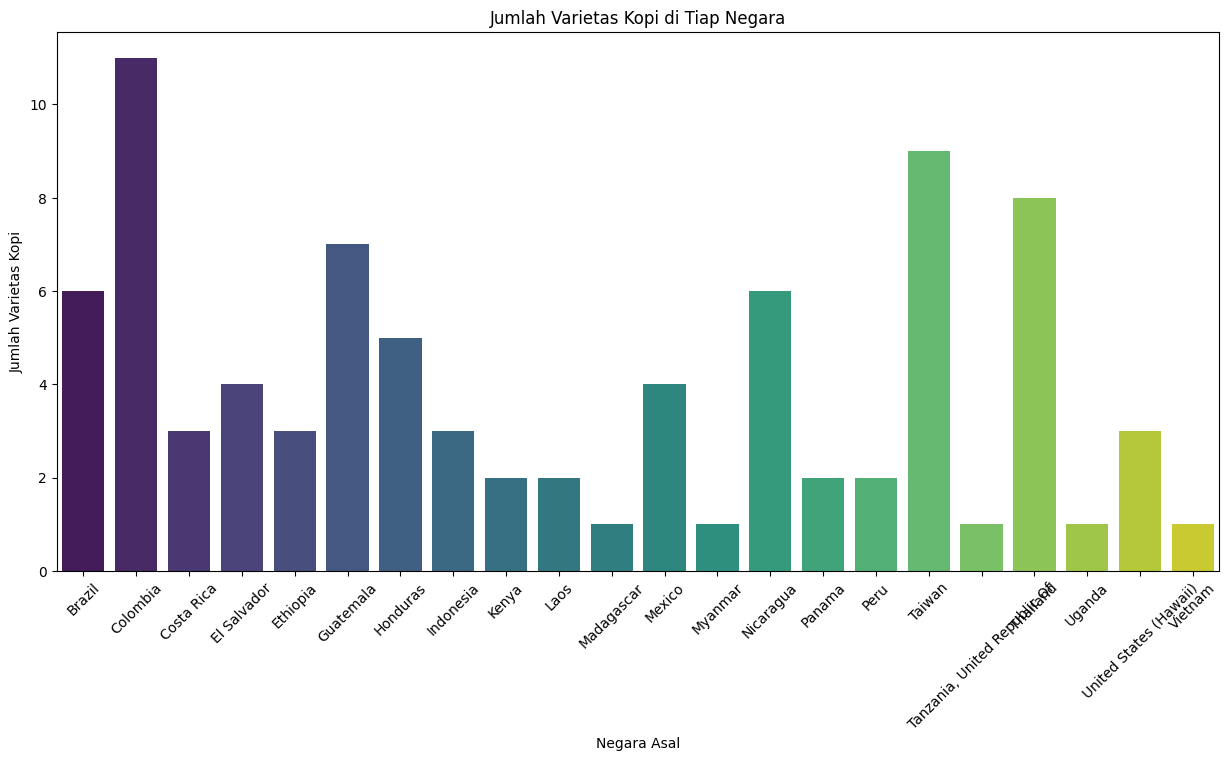

In [18]:
#Akan dibuat sebuah visualisasi berapa banyak varietas kopi di tiap negara
data_coffee_distr = pd.DataFrame(clean_df.groupby("Country of Origin")["Variety"].nunique().reset_index())


#buat grafiknya dalam bentuk bar plot
plt.figure(figsize=(15,7))
plt.title("Jumlah Varietas Kopi di Tiap Negara")
sns.barplot(data =data_coffee_distr, x = "Country of Origin", y="Variety", palette = 'viridis' )
plt.xlabel('Negara Asal')
plt.ylabel('Jumlah Varietas Kopi')
plt.xticks(rotation=45)

#tunjukkan grafik
plt.show

Berdasarkan  diatas, kita bisa ambil kesimpulan bahwa Colombia adalah negara yang memiliki jumlah varietas kopi terbanyak dibandingkan dengan negara-negara yang lain. Negara yang paling sedikit varietas kopinya adalah Vietnam, Myanmnar,Uganda dan Tanzania, dengan 1 varietas kopi

Selanjutnya kita akan melihat jumlah varietas kopi berdasarkan letak ketinggiannya

C:\Users\INTEL\AppData\Local\Temp\ipykernel_3972\988701599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_coffee_alt = pd.DataFrame(clean_df.groupby("Altitude_Category")["Variety"].nunique().reset_index())
C:\Users\INTEL\AppData\Local\Temp\ipykernel_3972\988701599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =data_coffee_alt, x = "Altitude_Category", y="Variety", palette = 'viridis' )


<function matplotlib.pyplot.show(close=None, block=None)>

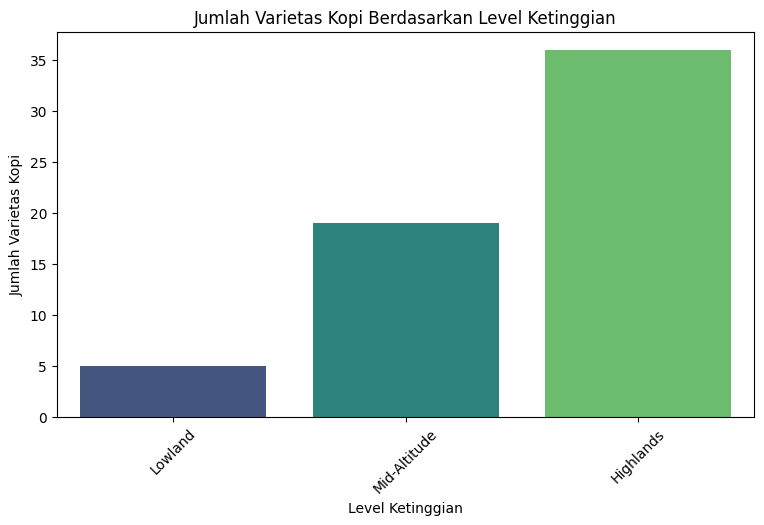

In [19]:
data_coffee_alt = pd.DataFrame(clean_df.groupby("Altitude_Category")["Variety"].nunique().reset_index())

#buat grafiknya dalam bentuk bar plot
plt.figure(figsize=(9,5))
plt.title("Jumlah Varietas Kopi Berdasarkan Level Ketinggian")
sns.barplot(data =data_coffee_alt, x = "Altitude_Category", y="Variety", palette = 'viridis' )
plt.xlabel('Level Ketinggian')
plt.ylabel('Jumlah Varietas Kopi')
plt.xticks(rotation=45)

#tunjukkan grafik
plt.show

Berdasarkan data, kita tahu bahwa kebanyakan kopi dikembangbiakkan di daerah dataran tinggi/ Highland.

Text(0, 0.5, 'Frekuensi')

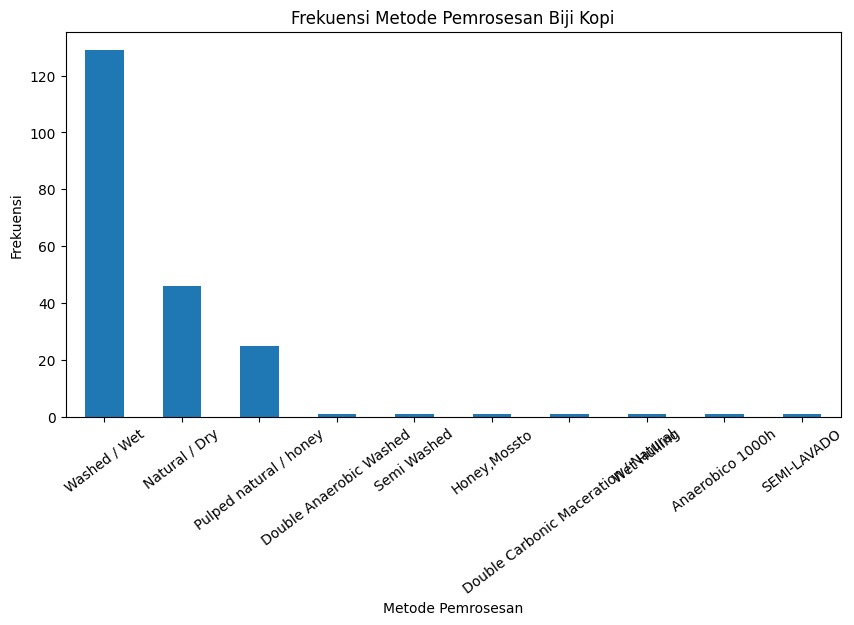

In [20]:
#Pengecekan jumlah data untuk masing-masing metode processing
freq_process = clean_df["Processing Method"].value_counts()

plt.title("Frekuensi Metode Pemrosesan Biji Kopi")
freq_process.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=37)
plt.xlabel("Metode Pemrosesan")
plt.ylabel("Frekuensi")

In [21]:
coffee_var_points = clean_df[["Variety","Total Cup Points"]]
mean_var_points = coffee_var_points.groupby("Variety")["Total Cup Points"].mean()
mean_var_points = pd.DataFrame(mean_var_points)
mean_var_points

,Total Cup Points
Variety,
"BOURBON, CATURRA Y CATIMOR",83.830000
Bourbon,83.754118
Bourbon Sidra,83.750000
"Bourbon, Catimor, Caturra, Typica",82.670000
Castillo,89.330000
Castillo Paraguaycito,85.670000
Castillo and Colombia blend,84.330000
"Castillo,Caturra,Bourbon",80.420000
Catimor,82.900909


Text(0, 0.5, 'Total Cup Points')

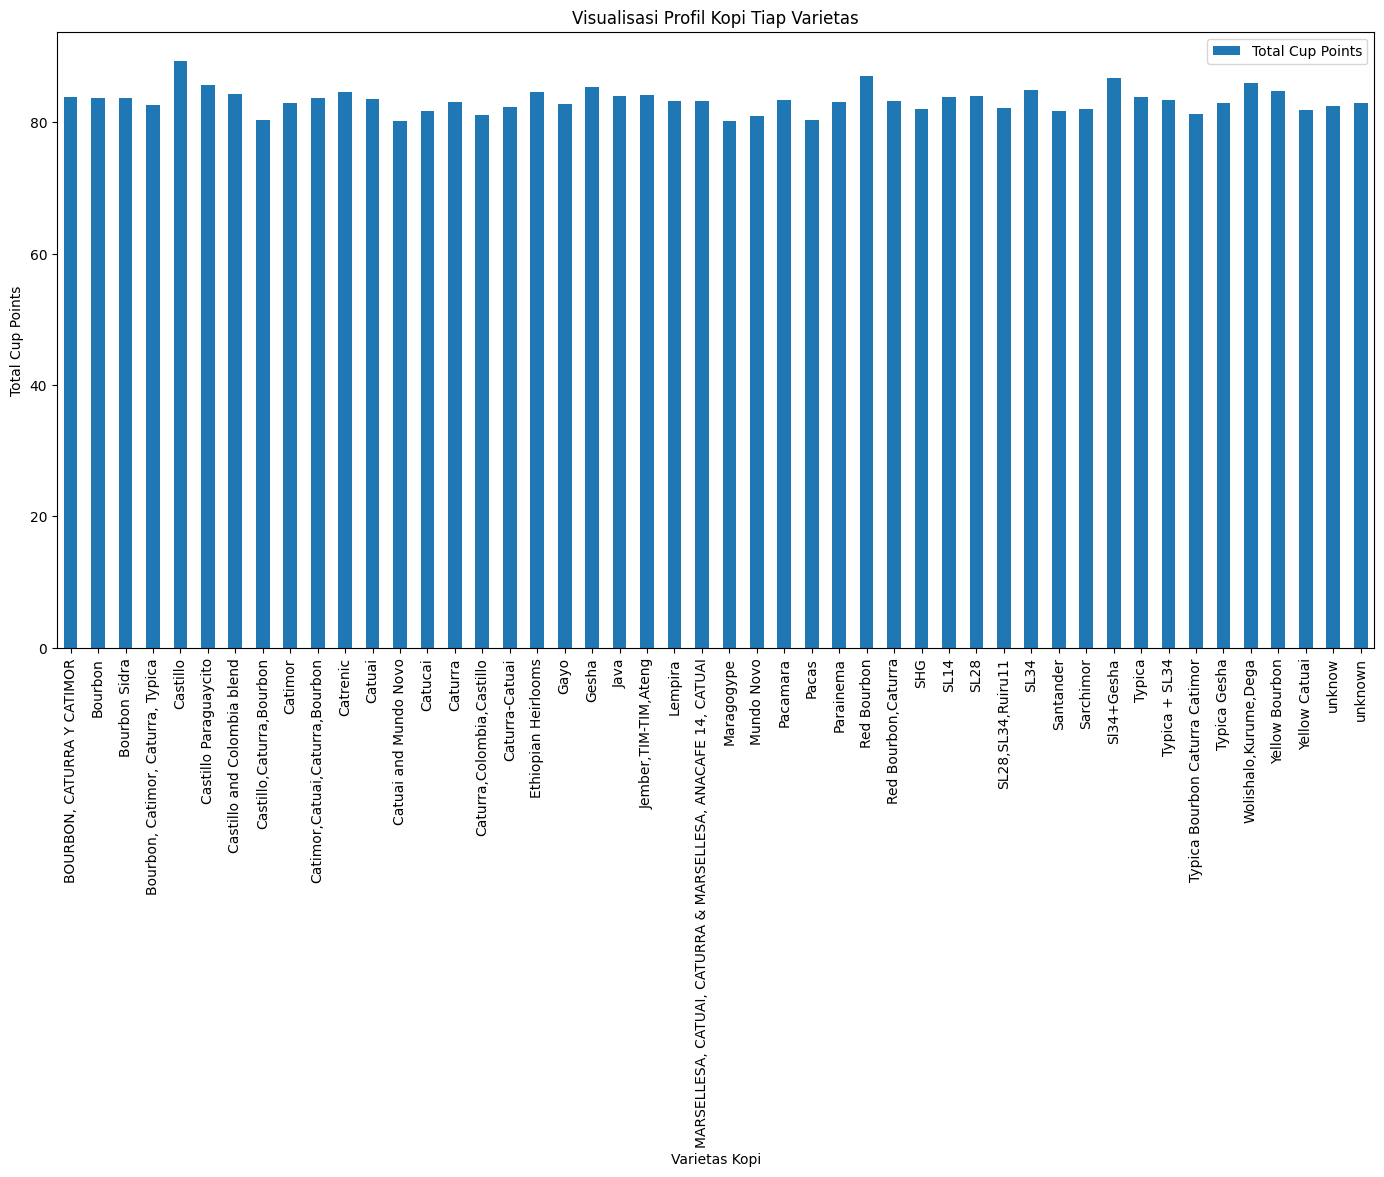

In [22]:
#visualisasi data
mean_var_points.plot(kind = 'bar',figsize=(17,8))
plt.title("Visualisasi Profil Kopi Tiap Varietas")
plt.xticks(rotation=90)
plt.xlabel("Varietas Kopi")
plt.ylabel("Total Cup Points")

Berdasarkan data diatas, dengan membandingkan antara kopi yang dibuat dari varietas kopi murni dan juga kopi yang dibuat dari campuran varietas diketahui bahwa mereka semua memiliki nilai rata-rata Total Cup Points antara 78-80. Nilai rata-rata Total Cup Points tertinggi diraih oleh varietas kopi Castillo dengan nilai Total Cup Points 89.

### **Uji Normalitas Parameter Profil Kopi**

Berikut ini akan dilakukan uji normalitas pada masing-masing parameter profil kopi seperti Acidity,Sweetnes,Balance dll. Hal ini penting dilakukan di setiap data, untuk memastikan bahwa data berdistribusi normal dan bisa diuji dengan uji statistik parameterik seperti Uji T, ANOVA dan lain-lain. Untuk uji test Normalitas, karena jumlah data yang banyak. Kita gunakan **uji Shapiro-Wilk**

In [23]:
from scipy import stats

#Lakukan Uji Normalitas Kolmogorov Smirnov. Buat fungsinya
def ks_test(dataset,column,alpha):
    statss,p_value = stats.shapiro(dataset[column])
    print(f'P value:{p_value}')
    print(f'Statistic :{statss}')
    if p_value > alpha:
        print(f"Data pada kolom {column} berdistribusi normal")
    else:
        print(f"Data pada kolom {column} tidak berdistribusi normal")    

In [24]:
ks_test(clean_df,"Sweetness",0.05)
ks_test(clean_df,"Acidity",0.05)
ks_test(clean_df,"Balance", 0.05)
ks_test(clean_df,"Uniformity", 0.05)
ks_test(clean_df,"Body", 0.05)
ks_test(clean_df,"Clean Cup", 0.05)
ks_test(clean_df,"Flavor", 0.05)
ks_test(clean_df,"Aroma", 0.05)
ks_test(clean_df,"Aftertaste", 0.05)


P value:1.0
Statistic :1.0
Data pada kolom Sweetness berdistribusi normal
P value:0.027341206548911503
Statistic :0.9850274486452893
Data pada kolom Acidity tidak berdistribusi normal
P value:0.009414044672648059
Statistic :0.9819759236363613
Data pada kolom Balance tidak berdistribusi normal
P value:1.3042755469190409e-30
Statistic :0.06880249788314063
Data pada kolom Uniformity tidak berdistribusi normal
P value:0.00426807819101642
Statistic :0.9796373681503043
Data pada kolom Body tidak berdistribusi normal
P value:1.0
Statistic :1.0
Data pada kolom Clean Cup berdistribusi normal
P value:0.03261799790834578
Statistic :0.9855241204966639
Data pada kolom Flavor tidak berdistribusi normal
P value:0.0050178424939443834
Statistic :0.980121798160822
Data pada kolom Aroma tidak berdistribusi normal
P value:0.009981270526673651
Statistic :0.9821461093546534
Data pada kolom Aftertaste tidak berdistribusi normal


c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Dari hasil uji normalitas dengan menggunakan metode Uji Shapiro-Wilk dan membandingkan P-Value, kita tahu bahwa parameter untuk profil kopi ada yang tidak berdistribusi normal. 

### **Analisis Korelasi terhadap Parameter-Parameter Penentu Kualitas Kopi (Total Cup Points)**

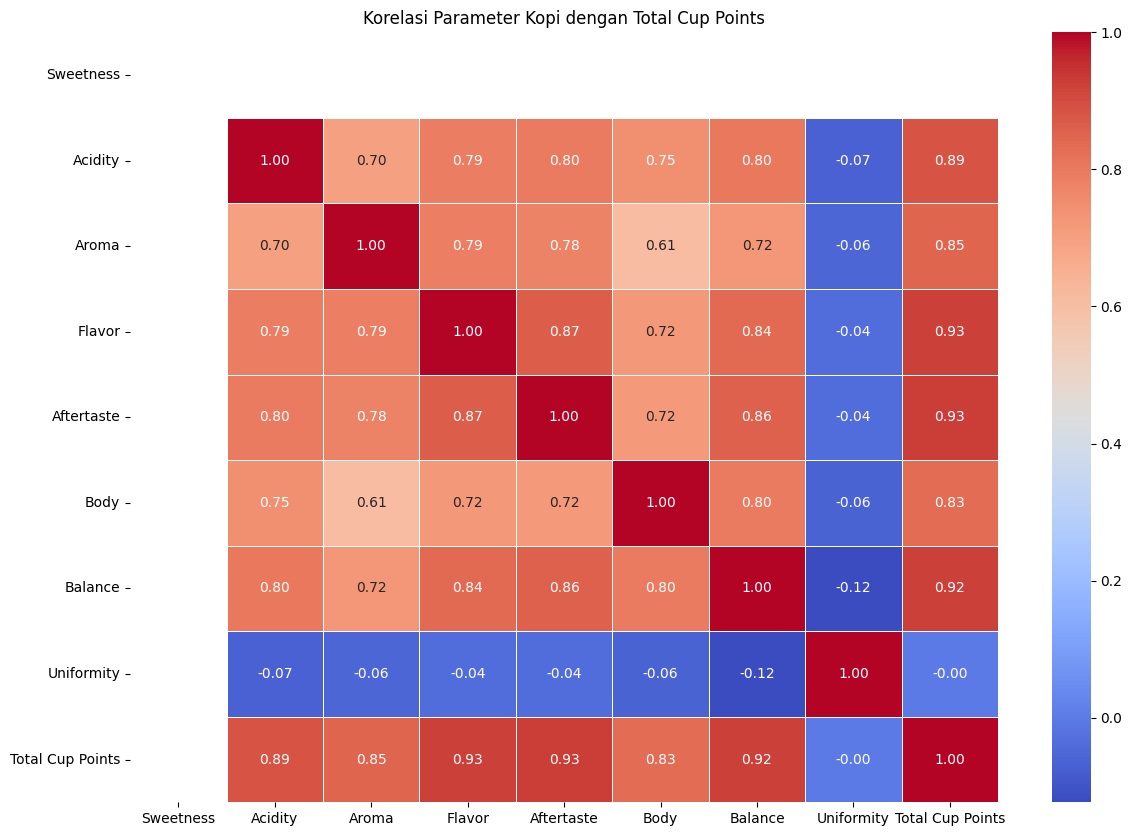

In [25]:
#Melakukan analisis korelasi pada parameter numerik dan total cup points(Nilai Kopi)
data_correl = {
    "Sweetness":clean_df["Sweetness"].copy(),
    "Acidity": clean_df["Acidity"].copy(),
    "Aroma" : clean_df["Aroma"].copy(),
    "Flavor":clean_df["Flavor"].copy(),
    "Aftertaste":clean_df["Aftertaste"].copy(),
    "Body":clean_df["Body"].copy(),
    "Balance":clean_df["Balance"].copy(),
    "Uniformity":clean_df["Uniformity"].copy(),
    "Total Cup Points":clean_df["Total Cup Points"].copy()
}


#jadikan data frame
dataframe_correl = pd.DataFrame(data_correl)

#lakukan korelasi pearson
correlation_matrix = dataframe_correl.corr(method='spearman')

#buat visualisasi
plt.figure(figsize=(14,10))
plt.title('Korelasi Parameter Kopi dengan Total Cup Points')
sns.heatmap(correlation_matrix,annot = True, fmt = ".2f",cmap="coolwarm",linewidths=.5)
plt.show()

Berdasarkan heatmap, kita bisa temukan korelasi antara parameter asiditas/keasaman,aroma,flavor,aftertaste, body, balance dan uniformity terhadap total cup points. Nilai parameter hampir semuanya berkorelasi positif dengan nilai Total Cup Points, kecuali Uniformity, yang bernilai korelasi 0.00 atau tidak memiliki keterkaitan apapun dengan total cup points. 

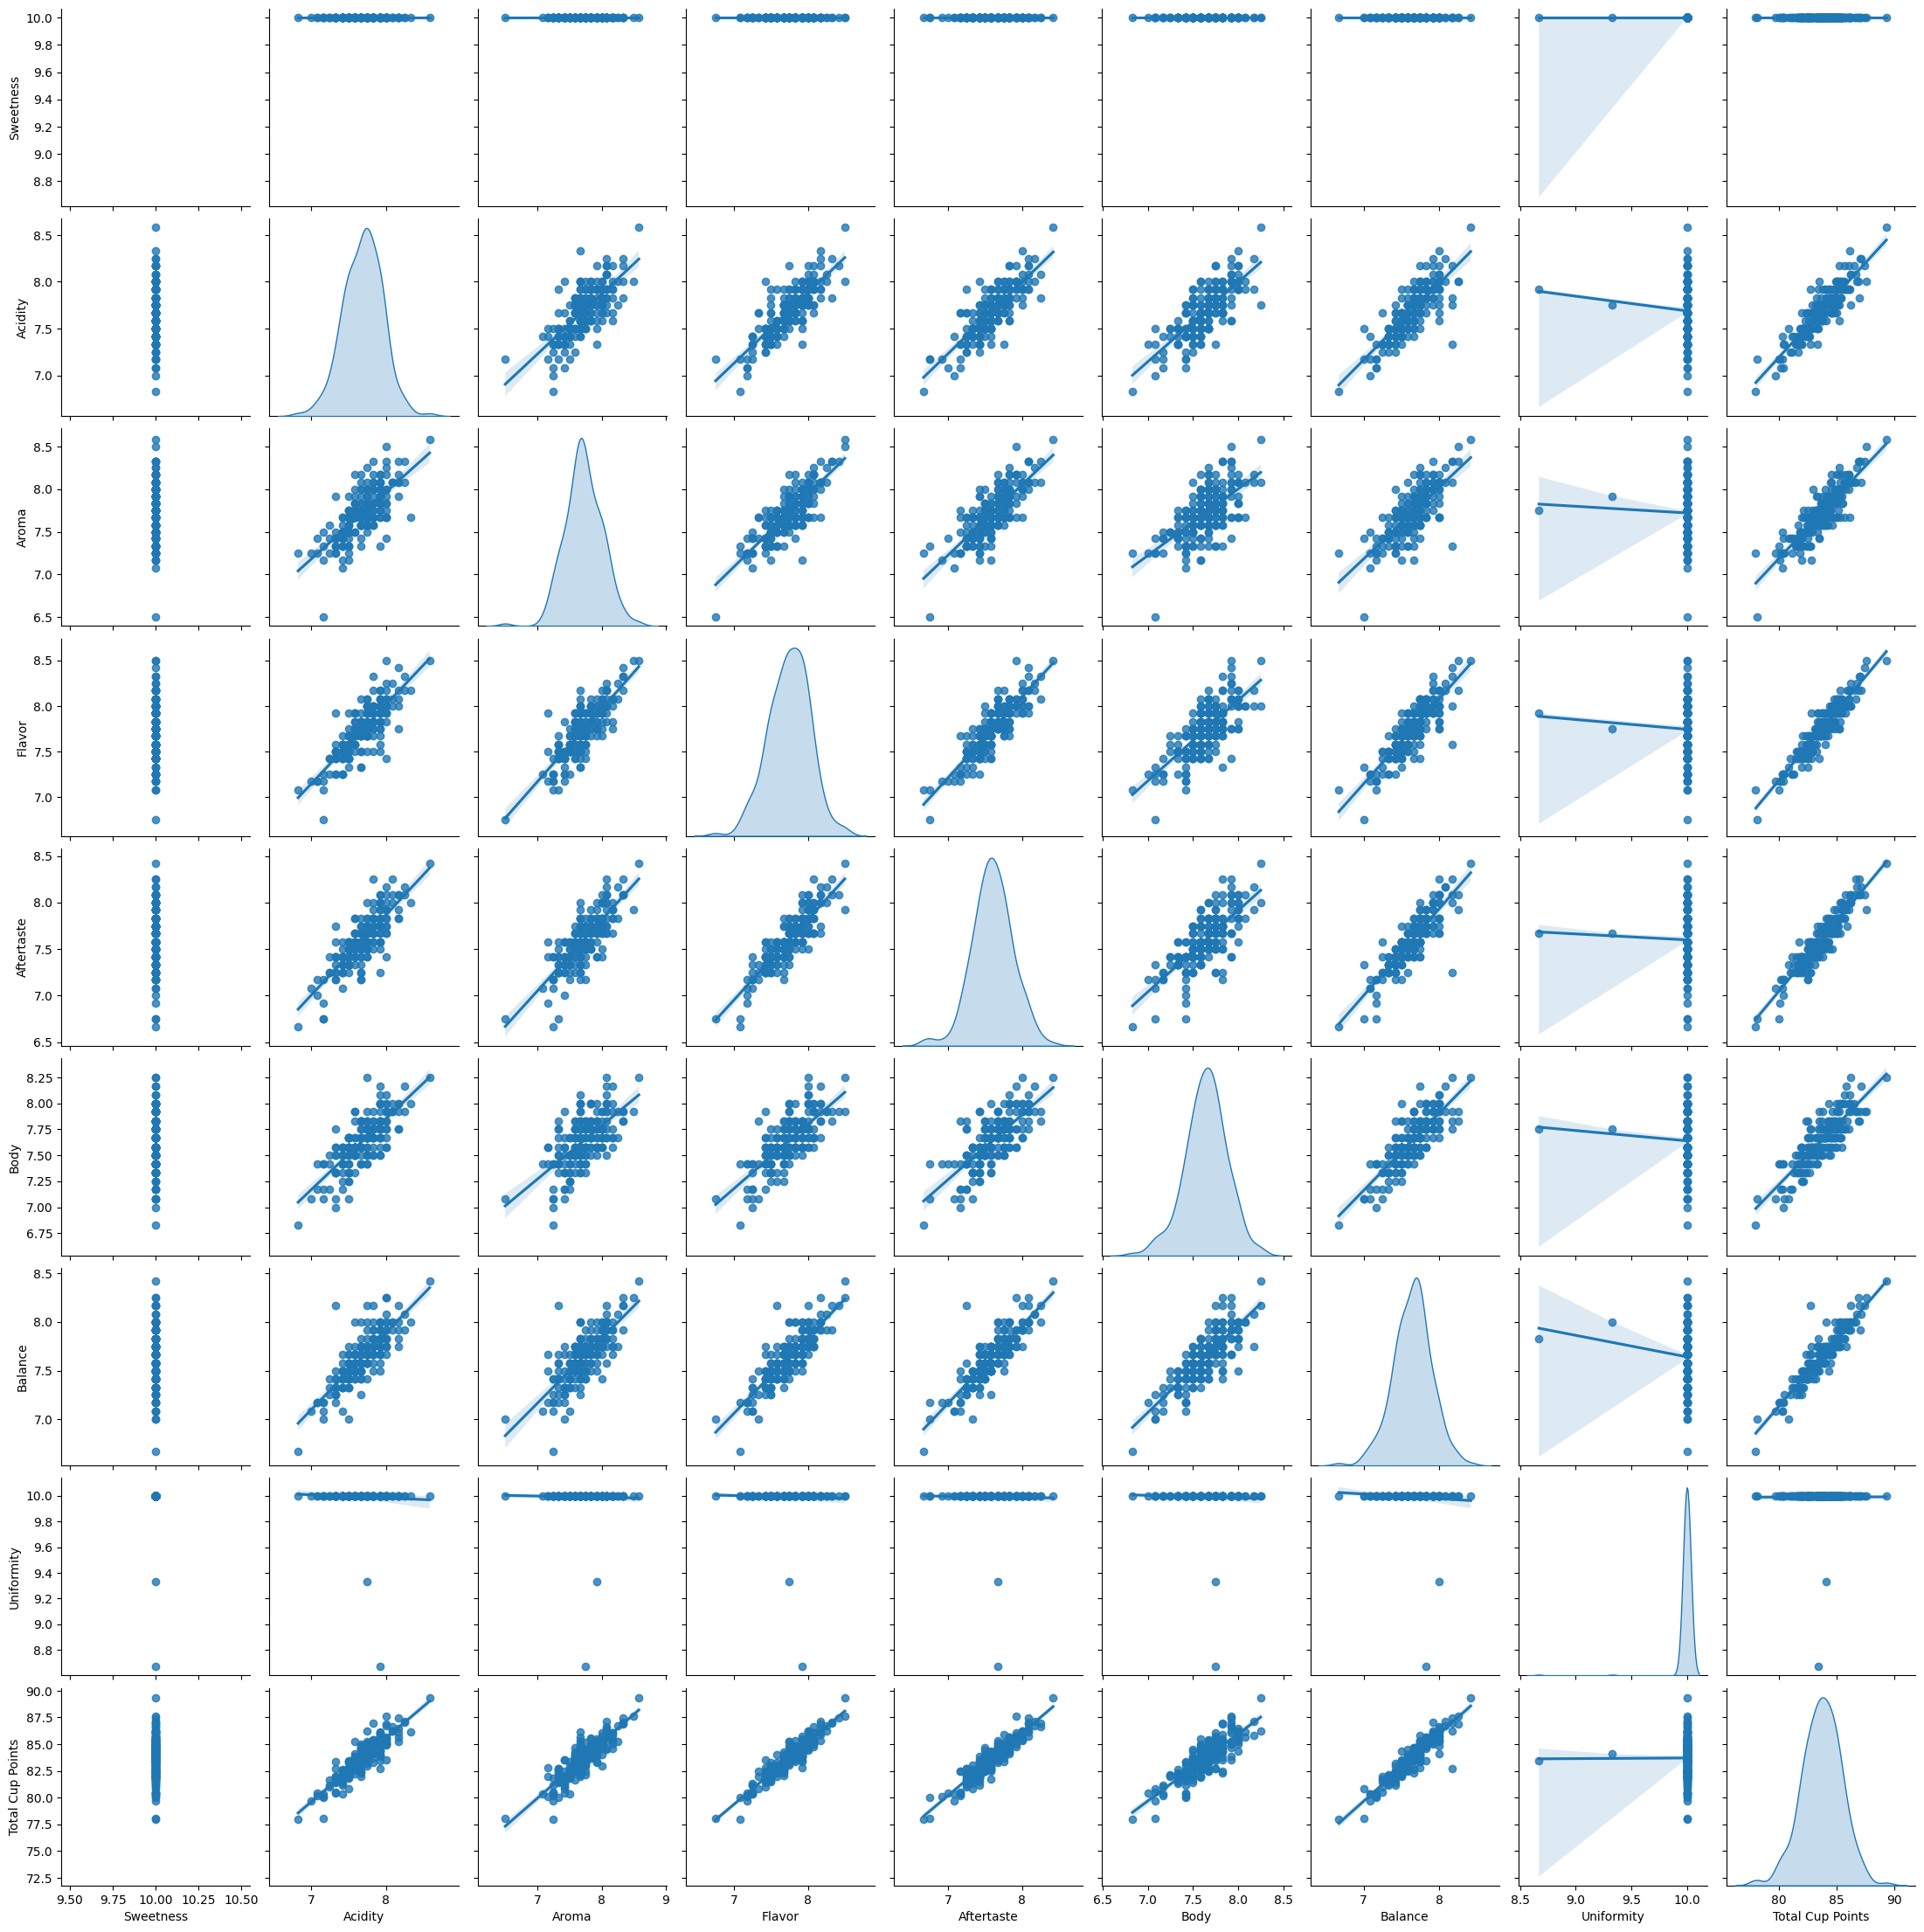

In [26]:
#Membuat pairplot untuk seluruh kombinasi data
sns.pairplot(dataframe_correl, kind='reg',diag_kind="kde")

## **Principal Component Analysis (PCA)**

Analisis PCA adalah teknik analisis yang digunakan untuk "meringkas" informasi yang ada pada data tanpa menghilangkan data-data penting. 

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
#inisiasi scaler
scaler = StandardScaler()
numeric_data = ["Sweetness","Aroma","Flavor","Acidity","Total Cup Points","Body","Balance","Aftertaste","Uniformity","Clean Cup"]
data_scaled = clean_df[numeric_data].copy()
data_scaled = scaler.fit_transform(data_scaled)

#Lakukan proses PCA pada data numerik
pca = PCA()
principal_components = pca.fit_transform(data_scaled)


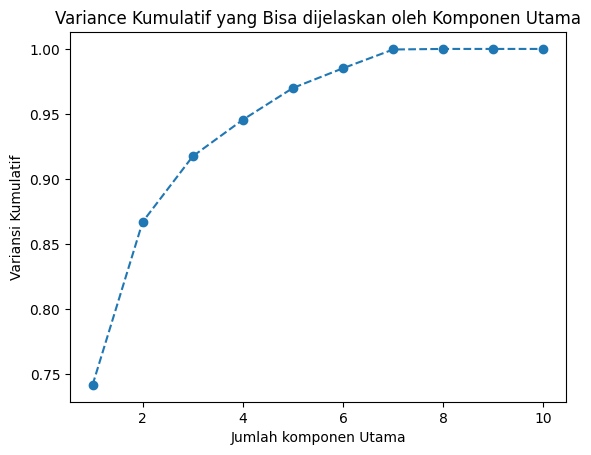

In [29]:
#Lakukan visualisasi data hasil PCA
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(), marker = 'o',linestyle='--')
plt.title("Variance Kumulatif yang Bisa dijelaskan oleh Komponen Utama")
plt.xlabel('Jumlah komponen Utama')
plt.ylabel("Variansi Kumulatif")
plt.show()


In [30]:
#Lakukan pemilihan n komponen
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(data_scaled)

#Buat DataFrame untuk menampung nilai komponen utama
principal_df = pd.DataFrame(data=principal_components,
                            columns=["principal components 1",'principal components 2', "principal components 3"])
principal_df

,principal components 1,principal components 2,principal components 3
0,-7.946152,-0.253587,-0.041654
1,-5.148834,-0.224148,-1.085923
2,-5.136357,-0.216044,-0.652568
3,-4.905137,-0.180948,0.778268
4,-4.670295,-0.241019,-0.687614
...,...,...,...
202,5.079895,0.045628,0.728583
203,5.262734,0.054494,0.530925
204,5.747586,-0.009207,-0.698229
205,7.972343,0.175702,1.562896


In [31]:
#Cetak hasil explained variance ratio
print(pca.explained_variance_ratio_)

[0.74147018 0.12550546 0.05041668]


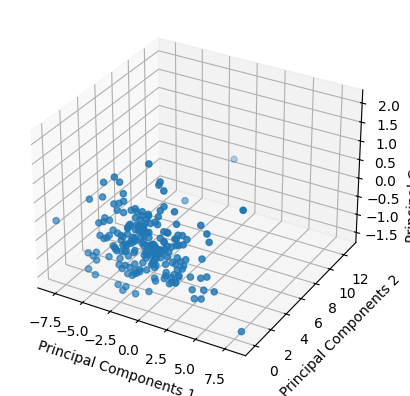

In [32]:
from mpl_toolkits.mplot3d import Axes3D

#buat grafik
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(principal_df["principal components 1"], principal_df["principal components 2"], principal_df["principal components 3"])

ax.set_xlabel('Principal Components 1')
ax.set_ylabel("Principal Components 2")
ax.set_zlabel("Principal Components 3")
plt.show()

Berdasarkan analisis PCA dan juga berdasarkan Principal Explained Ratio, bahwa kita bisa mereduksi data hingga 3 komponen utama dan mendapatkan sekitar 91.7% informasi dari total variansi. 
Artinya hanya dengan menggunakan 3 komponen utama, kita bisa mendapatkan 91,7% informasi. 
Keuntungan ini akan mempermudah kita dalam membuat model machine learning. Tanpa perlu repot-repot menggunakan semua kolom penilaian, data principal component cukup untuk membuat model. 

## **Pembuatan Model Machine Learning**

Proses analisis telah selesai dilakukan! Selanjutnya kita akan menggunakan data yang ada untuk membuat model machine learning untuk memprediksi Total Cup Points dari fitur-fitur yang ada di dalam dataset. Tipe machine learning yang akan kita gunakan adalah regresi. Akan dilakukan proses prediksi Total Cup Points yang merupakan total hasil dari parameter-parameter penilaian kopi sebelumnya. Kenapa regresi? Karena Total Cup Points adalah skala nilai bertipe floating point dari 0.0-100.0. Akan sulit jika menggunakan klasifikasi, mengingat bahwa klasifikasi hanya bisa dilakukan jika jumlah kategorinya bernilai diskrit( bilangan bulat)

Akan diuji beberapa algoritma pilihan, seperti algoritma Random Forest, XGBoost dan juga regresi linier multivariat. Kita juga akan menggunakan data hasil PCA untuk pembuatan model ini. 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import xgboost as xgb

### **Pembagian Data Latih dan Data Uji serta Scaling** 

In [34]:
x = principal_df #fitur dataset yang direduksi dengan PCA
y = clean_df["Total Cup Points"].copy() #Target yang ingin diprediksi nilainya

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)


#pembagian data latih dan data uji
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.2)


Akan dibuat fungsi prediksi dan evaluasi untuk menguji kinerja model

In [35]:
#inisiasi 
def predict_n_eval(x_test,y_test,model):
        y_pred = model.predict(x_test)

        #counting MSE
        MSE = mean_squared_error(y_test,y_pred)

        #counting MAE
        MAE = mean_absolute_error(y_test,y_pred)

        #counting MAPE (Mean Absolute Percentage Error)
        MAPE = np.mean(np.abs((y_test-y_pred)/y_test)) * 100

        #Counting R2 SCORE
        r2 = r2_score(y_test, y_pred)

        return y_pred,MSE,MAE,MAPE,r2

### **Model Random Forest**

In [36]:
 # Inisiasi Model Random Forest
rf_model = RandomForestRegressor(n_estimators = 300,random_state = 42) 
rf_model.fit(x_train,y_train)

rf_pred,mse_rf,mae_rf,mape_rf,r2_rf = predict_n_eval(x_test,y_test,rf_model)

In [37]:
#unpack hasil prediksi dan evaluasi
print(f"Nilai MAPE Random Forest sebesar : {mape_rf}")
print(f"Nilai MAE Random Forest sebesar : {mae_rf}")
print(f"Nilai MSE model Random Forest sebesar : {mse_rf}")
print(f"Nilai R2 score model Random Forest sebesar : {r2_rf}")

Nilai MAPE Random Forest sebesar : 0.16521081968606452
Nilai MAE Random Forest sebesar : 0.1354992063491387
Nilai MSE model Random Forest sebesar : 0.06500962214282498
Nilai R2 score model Random Forest sebesar : 0.983140187460255


Error yang dialami oleh model dengan data PCA sangat besar. Sebagai pembanding, kita gunakan data Non PCA yang diambil dari parameter asli dari dataset utama. Kita lakukan proses preprocessing sebagai berikut

In [38]:
#perbandingan dengan data tanpa pca
x_nonpca = clean_df[numeric_data]
y_nonpca = clean_df["Total Cup Points"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#pembagian data latih dan data uji
x_train_nonpca,x_test_nonpca,y_train_nonpca,y_test_nonpca = train_test_split(x_scaled,y,test_size=0.2)

Lakukan fitting data kembali dengan RandomForestRegressor,dilakukan pengulangan fitting dan predicting sebanyak 50 kali. Hasil MAPE ditampung dalam list mape_rf_nonpca

In [39]:
#inisiasi model
rf_model_nonpca = RandomForestRegressor(n_estimators = 300,random_state = 42)
rf_model_nonpca.fit(x_train_nonpca,y_train_nonpca)

#prediksi dan evaluasi hasil kinerja model
y_pred_non_rf,msenon_rf,maenon_rf,mapenon_rf,r2non_rf = predict_n_eval(x_test_nonpca,y_test_nonpca,rf_model_nonpca)

print(f"Nilai MAPE Random Forest sebesar : {mapenon_rf}")
print(f"Nilai MAE Random Forest sebesar : {maenon_rf}")
print(f"Nilai MSE model Random Forest sebesar : {msenon_rf}")
print(f"Nilai R2 score model Random Forest sebesar : {r2non_rf}")

Nilai MAPE Random Forest sebesar : 0.1416698296928633
Nilai MAE Random Forest sebesar : 0.1162253968253461
Nilai MSE model Random Forest sebesar : 0.04893493978834582
Nilai R2 score model Random Forest sebesar : 0.9831335837637346


### **XGBoost Regression**

Model kedua yang akan digunakan sebagai pembanding adalah model XGBoost. Model ini telah digunakan juga sebagai pembanding bagi Random Forest Regressor di proyek saya yang lain dengan judul "Flight Price Prediction".
Berikut adalah inisiasi modelnya

In [40]:
xgboost= xgb.XGBRegressor(objective='reg:squarederror',
                                      learning_rate = 0.1,
                                      n_estimators = 300,
                                      random_state = 42,
                                      reg_lambda = 2,
                                      verbosity=2)
xgboost.fit(x_train,y_train)
y_pred_xgb_pca,mse_xgb_pca,mae_xgb_pca,mape_xgb_pca,r2_xgb_pca = predict_n_eval(x_test,y_test,xgboost)

print(f"Nilai MAPE XGB dengan data PCA sebesar : {mape_xgb_pca}")
print(f"Nilai MAE XGB dengan data PCA sebesar : {mae_xgb_pca}")
print(f"Nilai MSE model XGB dengan data PCA sebesar : {mse_xgb_pca}")
print(f"Nilai R2 score model XGB dengan data PCA sebesar : {r2_xgb_pca}")


Nilai MAPE XGB dengan data PCA sebesar : 0.17269926037029767
Nilai MAE XGB dengan data PCA sebesar : 0.14126831781296512
Nilai MSE model XGB dengan data PCA sebesar : 0.07903837791952058
Nilai R2 score model XGB dengan data PCA sebesar : 0.979501923080848


Lakukan hal yang sama untuk data non-PCA.

In [41]:
#inisiasi dan fitting model XGBoost
xgboost.fit(x_train_nonpca,y_train_nonpca)

y_pred_xgb_nonpca,mse_xgb_nonpca,mae_xgb_nonpca,mape_xgb_nonpca,r2_xgb_nonpca = predict_n_eval(x_test_nonpca,y_test_nonpca,xgboost)

print(f"Nilai MAPE XGB dengan data non-PCA sebesar : {mape_xgb_nonpca}")
print(f"Nilai MAE XGB dengan data non-PCA sebesar : {mae_xgb_nonpca}")
print(f"Nilai MSE model XGB dengan data non-PCA sebesar : {mse_xgb_nonpca}")
print(f"Nilai R2 score model XGB dengan data non-PCA sebesar : {r2_xgb_nonpca}")


Nilai MAPE XGB dengan data non-PCA sebesar : 0.1630293579727637
Nilai MAE XGB dengan data non-PCA sebesar : 0.13351321992420023
Nilai MSE model XGB dengan data non-PCA sebesar : 0.07698669934928482
Nilai R2 score model XGB dengan data non-PCA sebesar : 0.9734649777541874


### **Regresi Linier**

In [42]:
lr = LinearRegression()

#fitting model terhadap data PCA
lr.fit(x_train,y_train)

#prediks dan evaluasi model regresi linier
y_pred_lr_pca,mse_lr_pca,mae_lr_pca,mape_lr_pca,r2_lr_pca = predict_n_eval(x_test,y_test,lr)

print(f"Nilai MAPE regresi linier PCA sebesar : {mape_lr_pca}")
print(f"Nilai MAE regresi linier PCA sebesar : {mae_lr_pca}")
print(f"Nilai MSE model regresi linier PCA sebesar : {mse_lr_pca}")
print(f"Nilai R2 score model regresi linier PCA sebesar : {r2_lr_pca}")


Nilai MAPE regresi linier PCA sebesar : 0.08309404158093797
Nilai MAE regresi linier PCA sebesar : 0.06945769694700758
Nilai MSE model regresi linier PCA sebesar : 0.006333938370366875
Nilai R2 score model regresi linier PCA sebesar : 0.998357335267569


In [43]:
#fitting model ke data non pca
lr.fit(x_train_nonpca,y_train_nonpca)

#prediks dan evaluasi model regresi linier
y_pred_lr_nonpca,mse_lr_nonpca,mae_lr_nonpca,mape_lr_nonpca,r2_lr_nonpca = predict_n_eval(x_test_nonpca,y_test_nonpca,lr)

print(f"Nilai MAPE regresi linier non PCA sebesar : {mape_lr_nonpca}")
print(f"Nilai MAE regresi linier non pca sebesar : {mae_lr_nonpca}")
print(f"Nilai MSE model regresi linier non pca sebesar : {mse_lr_nonpca}")
print(f"Nilai R2 score model regresi linier non pca sebesar : {r2_lr_nonpca}")

Nilai MAPE regresi linier non PCA sebesar : 0.0916297155569602
Nilai MAE regresi linier non pca sebesar : 0.07642184530548438
Nilai MSE model regresi linier non pca sebesar : 0.009353751552807196
Nilai R2 score model regresi linier non pca sebesar : 0.9967760404377195


Untuk mempermudah melihat modelnya, kita akan lihat melalui tabel dan dalam bentuk scatter plot

In [44]:
compare_model_data = {
    'PCA' : pd.Series([mape_rf,mape_xgb_pca,mape_lr_pca],
                     index = ['Random Forest','XGBoost','Linear Regression']),
    'Non-PCA': pd.Series([mapenon_rf,mape_xgb_nonpca,mape_lr_nonpca],
                        index = ['Random Forest','XGBoost','Linear Regression'])
}

compare_model_df = pd.DataFrame(compare_model_data)
compare_model_df

,PCA,Non-PCA
Random Forest,0.165211,0.141670
XGBoost,0.172699,0.163029
Linear Regression,0.083094,0.091630


Tabel diatas adalah bentuk data Mean Absolute Percentage Value yang telah dikumpulkan menjadi satu dalam satu tabel. Bisa dilihat bahwa model Random Forest dan XGBoost, baik data hasil PCA maupun non-PCA, memiliki nilai persentase error absolute diatas 0.1%. Sedangkan model regresi linier memiliki nilai 0.07%. Maka model Linear Regression lebih cocok untuk memodelkan permasalahan ini, meskipun perlu dilakukan pengujian lebih lanjut terhadap hyperparameter dan lain sebagainya.

### **Visualisasi Data Hasil Prediksi dengan Nilai Aktual**

Agar lebih enak untuk dilihat, akan dibuat sebuah visualisasi antara data hasil prediksi dari ketiga model dengan nilai aktual. Data aktual tertulis sebagai data_test di kolom

In [45]:
#kumpulkan semua dataset dalam satu dataframe
data_pred_act_pca = {
     'data_test' : y_test,
     'Random Forest': rf_pred,
     'XGBoost': y_pred_xgb_pca,
     'Linear Regression': y_pred_lr_pca
    
}
df_pred_act_pca = pd.DataFrame(data_pred_act_pca).reset_index()
df_pca_long = pd.melt(df_pred_act_pca,id_vars='data_test',value_vars = ['Random Forest','XGBoost','Linear Regression'],
                          var_name = 'Model',value_name='predicted')
df_pca_long
#df_pred_act_pca = pd.melt(df_pred_act_pca,id_vars = 'data_test'1)

,data_test,Model,predicted
0,81.17,Random Forest,81.274733
1,80.33,Random Forest,80.598733
2,83.25,Random Forest,83.306733
3,82.17,Random Forest,82.101233
4,86.17,Random Forest,86.216767
...,...,...,...
121,85.25,Linear Regression,85.183655
122,83.33,Linear Regression,83.374002
123,83.50,Linear Regression,83.566228
124,85.67,Linear Regression,85.578078


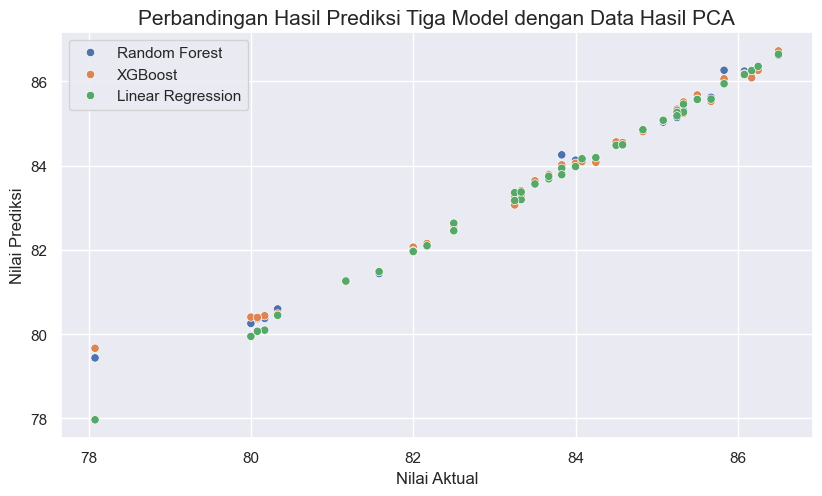

In [46]:
sns.set_theme(rc={'figure.figsize':(9.7,5.27)})
sns.scatterplot(data=df_pca_long, x='data_test', y='predicted', hue = 'Model')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Hasil Prediksi Tiga Model dengan Data Hasil PCA',fontsize=15)
plt.legend()
plt.show()

In [47]:
#kumpulkan semua dataset dalam satu dataframe
data_pred_act_nonpca = {
     'data_test' : y_test,
     'Random Forest': y_pred_non_rf,
     'XGBoost': y_pred_xgb_nonpca,
     'Linear Regression': y_pred_lr_nonpca
    
}
df_pred_act_nonpca = pd.DataFrame(data_pred_act_nonpca).reset_index()
df_nonpca_long = pd.melt(df_pred_act_pca,id_vars='data_test',value_vars = ['Random Forest','XGBoost','Linear Regression'],
                          var_name = 'Model',value_name='predicted')
df_nonpca_long

,data_test,Model,predicted
0,81.17,Random Forest,81.274733
1,80.33,Random Forest,80.598733
2,83.25,Random Forest,83.306733
3,82.17,Random Forest,82.101233
4,86.17,Random Forest,86.216767
...,...,...,...
121,85.25,Linear Regression,85.183655
122,83.33,Linear Regression,83.374002
123,83.50,Linear Regression,83.566228
124,85.67,Linear Regression,85.578078


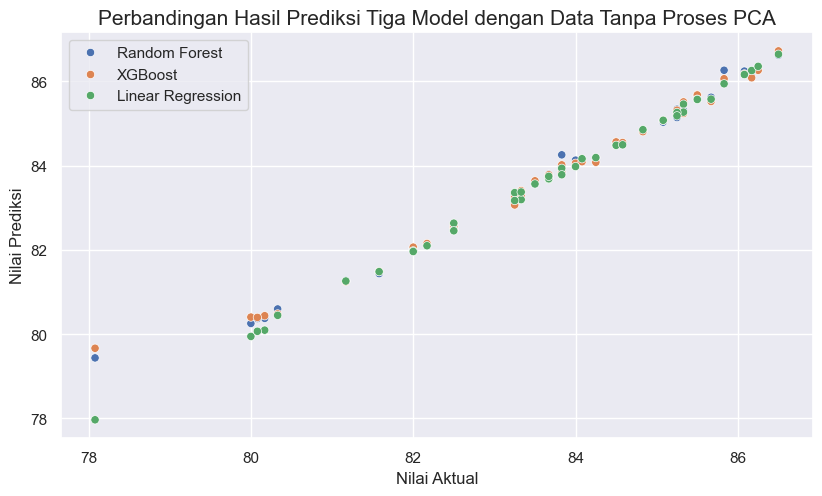

In [48]:
sns.set_theme(rc={'figure.figsize':(9.7,5.27)})
sns.scatterplot(data=df_nonpca_long, x='data_test', y='predicted', hue = 'Model')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Hasil Prediksi Tiga Model dengan Data Tanpa Proses PCA',fontsize=15)
plt.legend()
plt.show()